In [243]:
import sqlite3
import pandas
import matplotlib.pyplot as plt
import numpy as np

Part 1:

Problem 1:

In [244]:
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

# use sql to get data
salary_query = "SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries GROUP BY yearID, teamID"
team_info_query = "SELECT yearID, teamID, franchID, W, L, G FROM Teams GROUP BY yearID, teamID"

# generate dataframe from sql
team_salaries = pandas.read_sql(salary_query, conn)
team_info = pandas.read_sql(team_info_query, conn)

#calculating winning percentage
team_info["Winnig_Percentage"] = team_info["W"]/team_info["G"]*100

In [245]:
#inner join(merge) two tables by "yearID", "teamID".
team_relation = pandas.merge(team_info, team_salaries, on = ["yearID", "teamID"] )

In [246]:
team_relation

,yearID,teamID,franchID,W,L,G,Winnig_Percentage,total_payroll
0,1985,ATL,ATL,66,96,162,40.740741,14807000.0
1,1985,BAL,BAL,83,78,161,51.552795,11560712.0
2,1985,BOS,BOS,81,81,163,49.693252,10897560.0
3,1985,CAL,ANA,90,72,162,55.555556,14427894.0
4,1985,CHA,CHW,85,77,163,52.147239,9846178.0
...,...,...,...,...,...,...,...,...
853,2014,SLN,STL,90,72,162,55.555556,120693000.0
854,2014,TBA,TBD,77,85,162,47.530864,72689100.0
855,2014,TEX,TEX,67,95,162,41.358025,112255059.0
856,2014,TOR,TOR,83,79,162,51.234568,109920100.0


SQL code for creating this relation :

join_query = "SELECT yearID, teamID, franchID, W, L, G FROM Teams INNER JOIN Salaries "

team = pandas.read_sql(join_query, conn)

To avoid additional empty data(like some yearID and TeamID appear only in one table not the other), we use inner join to get mutual dataset. Using inner join based on the yearID and teamID to combine two tables: team_info and team_salaries. Thus, all data in the dataframe can be connected without unpaired data. In that way, we can clean the missing data.

Part 2:

Problem 2:

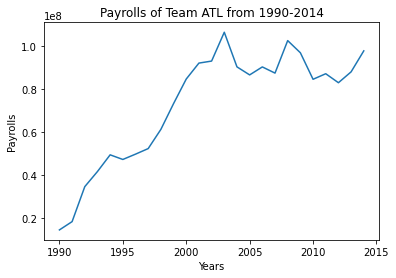

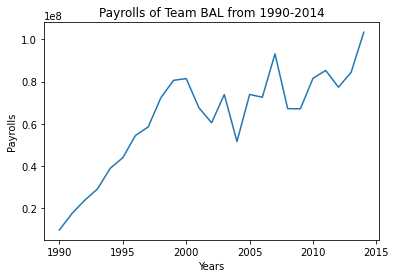

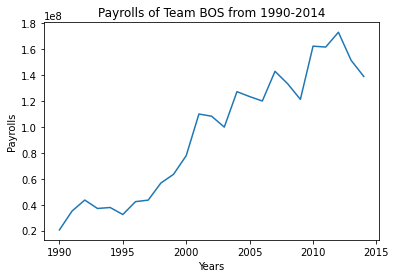

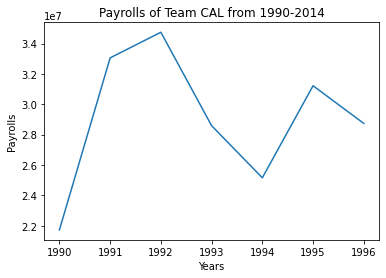

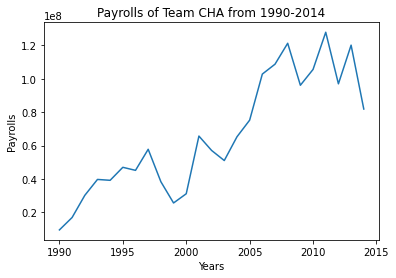

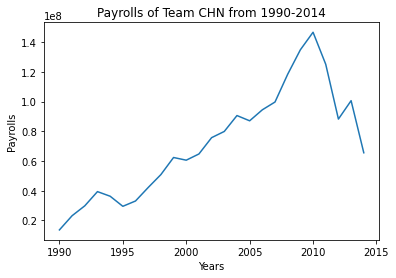

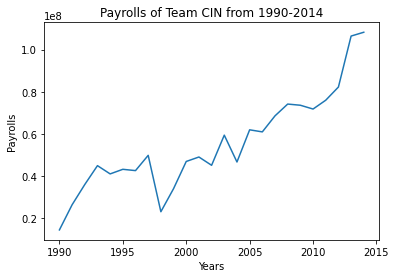

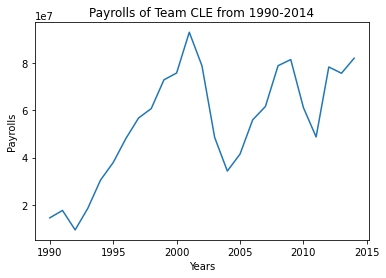

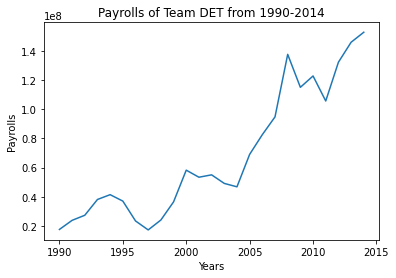

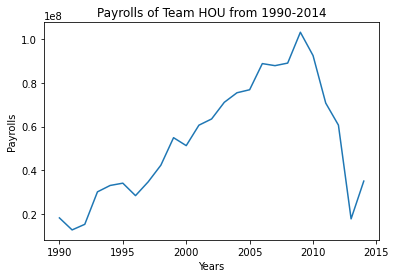

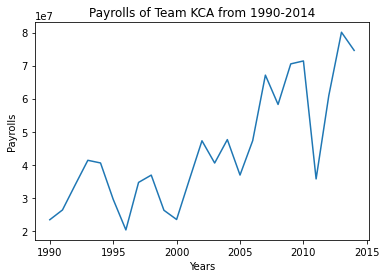

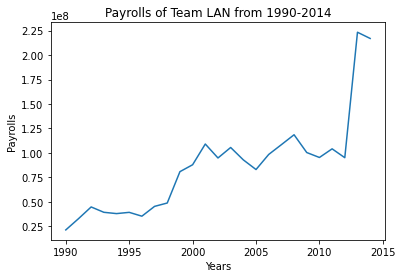

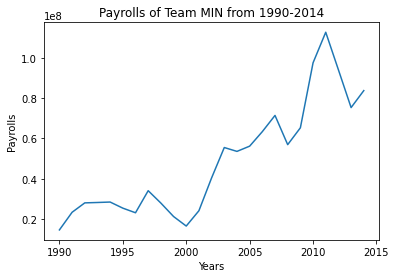

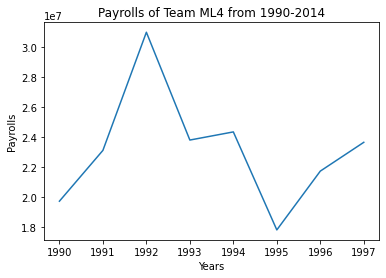

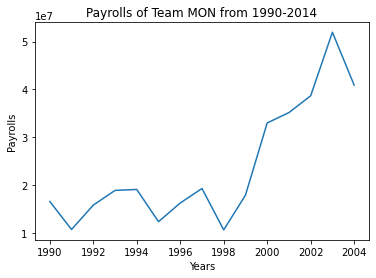

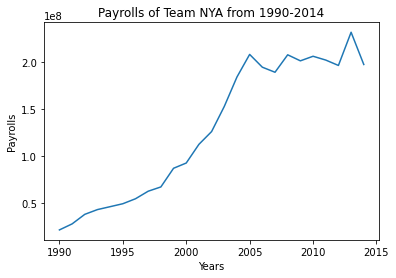

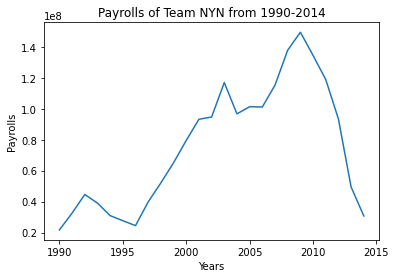

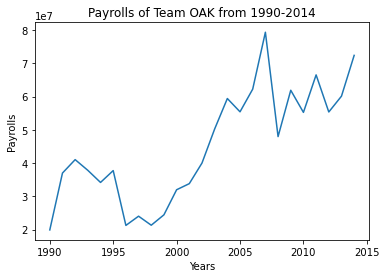

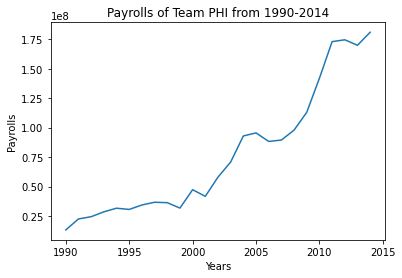

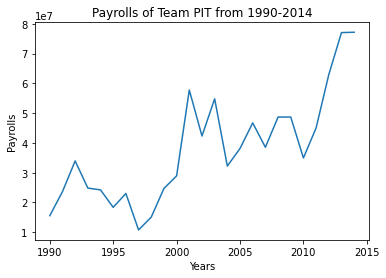

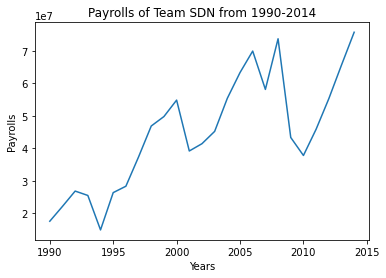

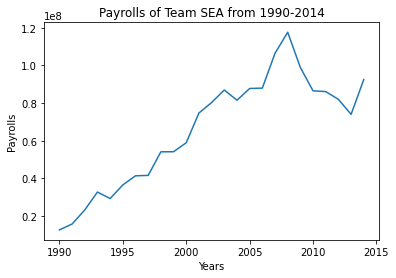

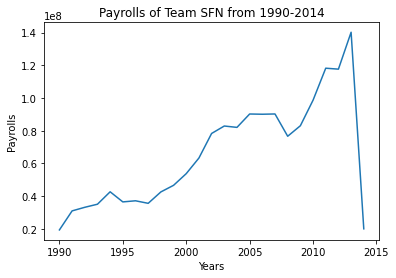

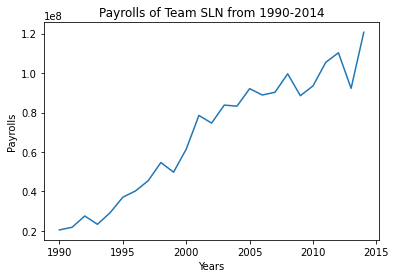

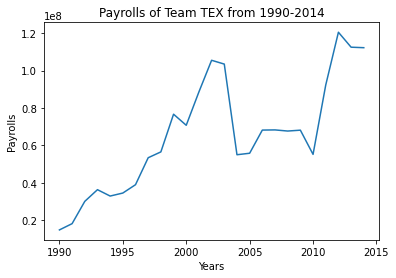

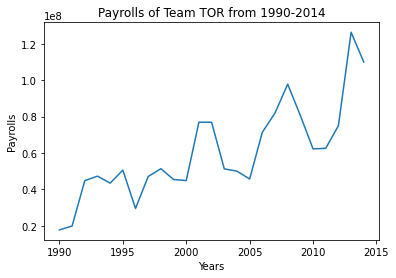

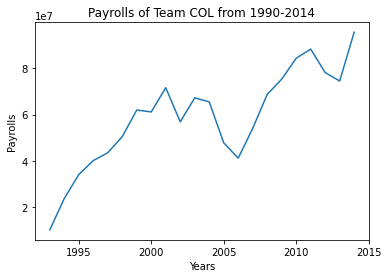

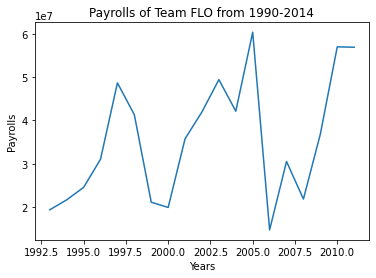

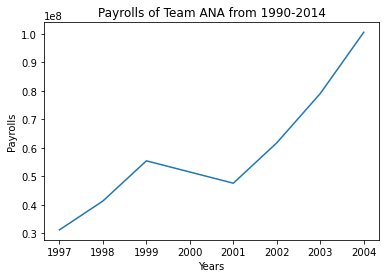

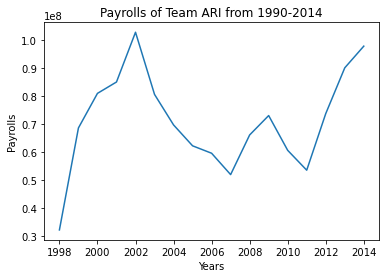

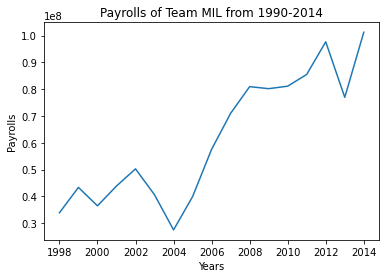

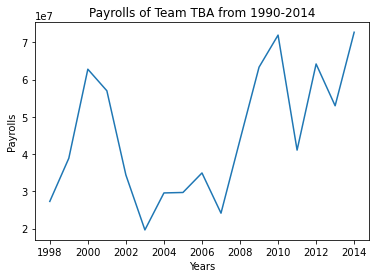

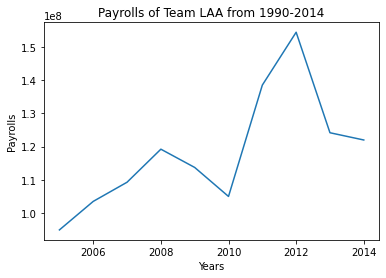

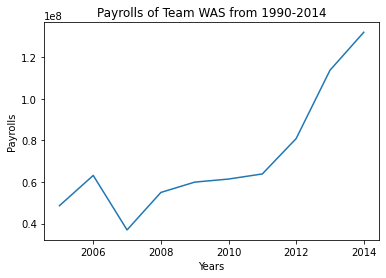

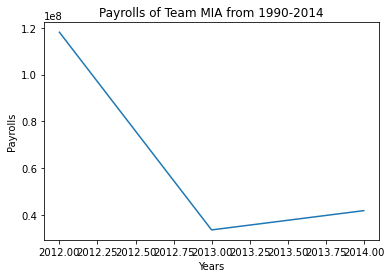

In [247]:
year = []
payroll = []
team_name = pandas.unique(team_relation["teamID"])

#iterate through names and each element, add data to year list and payroll list.
for name in team_name:
    year.clear()
    payroll.clear()
    for x in range(0,858):
        if result.iat[x,1] == name and result.iat[x,0] >= 1990 and result.iat[x,0] <= 2014: 
            year.append(team_relation.iat[x,0])
            payroll.append(team_relation.iat[x,7])
    #label
    plt.title("Payrolls of Team " + name + " from 1990-2014")
    plt.xlabel("Years")
    plt.ylabel("Payrolls")
    #plot
    plt.plot(year, payroll)
    plt.show()      

Question 1:

There is a trend for payrolls to increase over time(from 1990 to 2014).

Problem 3:

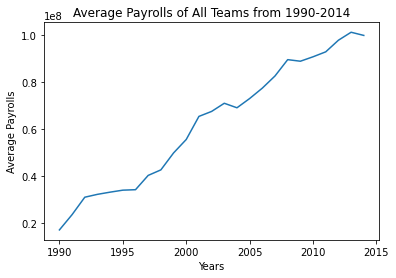

In [248]:
year = list(range(1990, 2015, 1))
payroll = []
team_name = pandas.unique(team_relation["teamID"])
avg_payroll = []

#Iterate through years and each element, add data payroll list. 
#Then calculate the average of each year, and add to avg_payroll.
#reset payroll for next iteration.
for y in year:
    for x in range(0,858):
        if team_relation.iat[x,0] == y: 
            payroll.append(team_relation.iat[x,7])
    avg_payroll.append([np.average(np.array(payroll))])
    payroll.clear() 
#label
plt.title("Average Payrolls of All Teams from 1990-2014")
plt.xlabel("Years")
plt.ylabel("Average Payrolls")
#plot
plt.plot(year, avg_payroll)
plt.show()    

In [249]:
#Create new column "bins"
team_relation["bins"] = pandas.cut(team_relation["yearID"],  5)
team_relation

,yearID,teamID,franchID,W,L,G,Winnig_Percentage,total_payroll,bins
0,1985,ATL,ATL,66,96,162,40.740741,14807000.0,"(1984.971, 1990.8]"
1,1985,BAL,BAL,83,78,161,51.552795,11560712.0,"(1984.971, 1990.8]"
2,1985,BOS,BOS,81,81,163,49.693252,10897560.0,"(1984.971, 1990.8]"
3,1985,CAL,ANA,90,72,162,55.555556,14427894.0,"(1984.971, 1990.8]"
4,1985,CHA,CHW,85,77,163,52.147239,9846178.0,"(1984.971, 1990.8]"
...,...,...,...,...,...,...,...,...,...
853,2014,SLN,STL,90,72,162,55.555556,120693000.0,"(2008.2, 2014.0]"
854,2014,TBA,TBD,77,85,162,47.530864,72689100.0,"(2008.2, 2014.0]"
855,2014,TEX,TEX,67,95,162,41.358025,112255059.0,"(2008.2, 2014.0]"
856,2014,TOR,TOR,83,79,162,51.234568,109920100.0,"(2008.2, 2014.0]"


Problem 4:

In [250]:
bin = pandas.unique(team_relation["bins"])
#Create an empty dictionary
bin_dict = {}

#iterate through each element, using bin as a first key, nameId as second key to store Payroll and Winning Percentage.
for i in range(0,858):
    if team_relation.iat[i,8] in bin_dict:
        if team_relation.iat[i,1] in bin_dict[team_relation.iat[i,8]]:
            bin_dict[team_relation.iat[i,8]][team_relation.iat[i,1]].append((team_relation.iat[i,7],team_relation.iat[i,6]))
        else :
            bin_dict[team_relation.iat[i,8]][team_relation.iat[i,1]] = []
    else: 
        bin_dict[team_relation.iat[i,8]] = {}


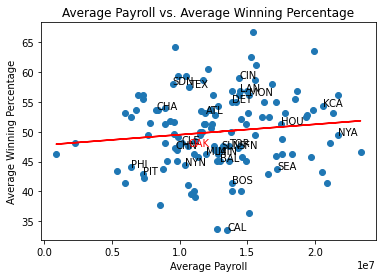

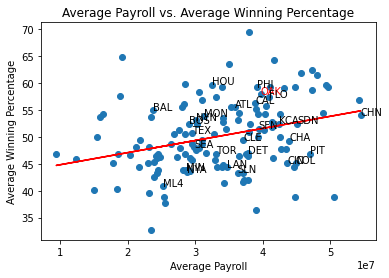

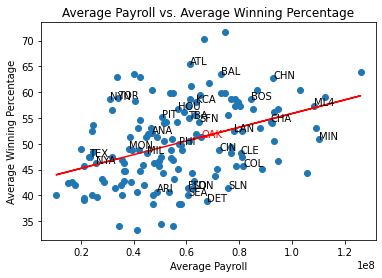

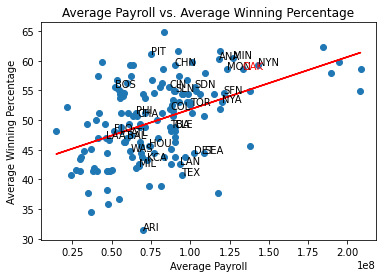

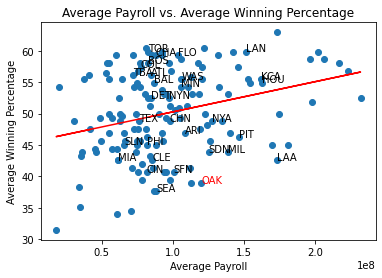

In [251]:
avg_payroll = []
avg_winpercent = []
annotations = []

#iterate through each element, using bin as a first key, nameId as second key to get Payroll and Winning Percentage.
#Store Payroll and Winning Percentage's average value in avg_payroll and avg_winpercent respectively.
for keys in bin_dict:
    plt.clf()
    for names in bin_dict[keys]:
        annotations.append(names)
        for element in bin_dict[keys][names]:
            avg_payroll.append(np.average(np.array(element[0])))
            avg_winpercent.append(np.average(np.array(element[1])))
    #label and polt scatter graph
    plt.title("Average Payroll vs. Average Winning Percentage")
    plt.xlabel("Average Payroll")
    plt.ylabel("Average Winning Percentage")
    plt.scatter(avg_payroll, avg_winpercent)
    # polt line graph
    z = np.polyfit(avg_payroll, avg_winpercent, 1)
    p = np.poly1d(z)
    plt.plot(avg_payroll,p(avg_payroll),"r-")
    #Label each nameID
    for i, label in enumerate(annotations):
        if label == "OAK":
            plt.text(avg_payroll[i], avg_winpercent[i],label,color = "red")
        else:
            plt.text(avg_payroll[i], avg_winpercent[i],label)
    #reset for next iteration.        
    avg_payroll.clear()
    avg_winpercent.clear()
    annotations.clear()
    plt.show()
    

Question 2:

For the graph, the regression line means the average level of "paying for wins". Then, from those 5 graphs, the slope of regresion line is all positive, which means the more a team pays, they will win more. Also the slope of regresion line is approximately incresasing, which means every team increases their payoffs to get more wins. It means the outcome(win) is better than before when spending same amout of money. 

We can see from those graphs that some teams are always higher than the regression line, which means they succeed in the "paying for wins". The distance(for those points higher than the line) is longer means they are more successful. For example, ATL is one of the most scuuessful one in graph 3. It also maintain the good level since, in each graph, it is above the regression line.

For OAK(marked in red), we can clearly see that in the first graph(1895-1991), it is below the line, which means it is not as efficient as others. However, in the second(1991-1997), third(1997-2003) and fourth(2003-2008) graph, are above (or on) the line. Especailly on second(1991-1997) and fourth(2003-2008) graph, it is much higher than the line, then it means OAK is much more efficient than others. On the last graph (2008-20015), it is below the line, which means it is not as efficient

Part 3:

Problem 5:

In [252]:
year = pandas.unique(team_relation["yearID"])
payroll = []
team_name = pandas.unique(team_relation["teamID"])
avg_payroll = []
std_payroll = []
#iterate through each year and each element, store average payroll and standard deviation of payroll
for y in year:
    for x in range(0,858):
        if result.iat[x,0] == y: 
            payroll.append(team_relation.iat[x,7])
    avg_payroll.append([np.average(np.array(payroll))])
    std_payroll.append([np.std(np.array(payroll))])
    payroll.clear()  

diff = 0
std = 0
team_relation["Standardized_Payroll"] = np.nan
# calculation Standardized_Payroll
for i in range(0,858):
    diff = (team_relation.iat[i,7] - avg_payroll[team_relation.iat[i,0] - 1985])
    std = (diff / std_payroll[team_relation.iat[i,0] - 1985])
    team_relation.loc[i,['Standardized_Payroll']] = std
    
    
    

In [253]:
team_relation

,yearID,teamID,franchID,W,L,G,Winnig_Percentage,total_payroll,bins,Standardized_Payroll
0,1985,ATL,ATL,66,96,162,40.740741,14807000.0,"(1984.971, 1990.8]",1.952828
1,1985,BAL,BAL,83,78,161,51.552795,11560712.0,"(1984.971, 1990.8]",0.612972
2,1985,BOS,BOS,81,81,163,49.693252,10897560.0,"(1984.971, 1990.8]",0.339266
3,1985,CAL,ANA,90,72,162,55.555556,14427894.0,"(1984.971, 1990.8]",1.796358
4,1985,CHA,CHW,85,77,163,52.147239,9846178.0,"(1984.971, 1990.8]",-0.094676
...,...,...,...,...,...,...,...,...,...,...
853,2014,SLN,STL,90,72,162,55.555556,120693000.0,"(2008.2, 2014.0]",0.464941
854,2014,TBA,TBD,77,85,162,47.530864,72689100.0,"(2008.2, 2014.0]",-0.603311
855,2014,TEX,TEX,67,95,162,41.358025,112255059.0,"(2008.2, 2014.0]",0.277168
856,2014,TOR,TOR,83,79,162,51.234568,109920100.0,"(2008.2, 2014.0]",0.225207


Problem 6:

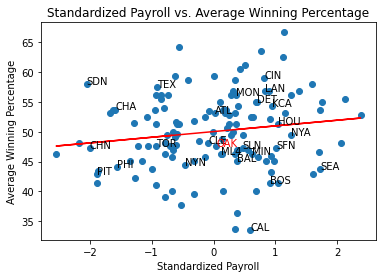

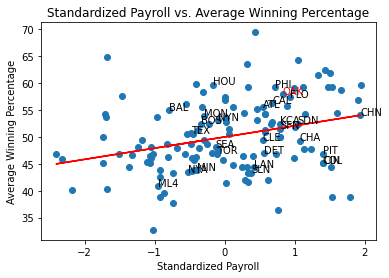

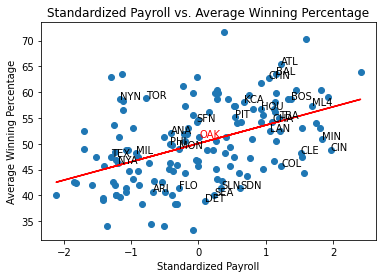

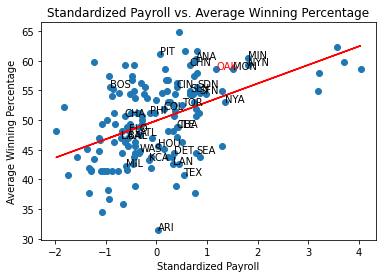

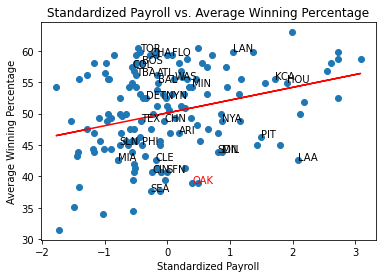

In [254]:
#Similar to previous parts. Firstly create an empty dictionary.
#Looping through elements to get payroll and winning percent
#Looping throught the dictionary to get average winning percentage and standardized payroll and plot.
std_dict = {}
for i in range(0,858):
    if team_relation.iat[i,8] in std_dict:
        if team_relation.iat[i,1] in std_dict[team_relation.iat[i,8]]:
            std_dict[team_relation.iat[i,8]][team_relation.iat[i,1]].append((team_relation.iat[i,9],team_relation.iat[i,6]))
        else :
            std_dict[team_relation.iat[i,8]][team_relation.iat[i,1]] = []
    else: 
        std_dict[team_relation.iat[i,8]] = {}
        
avg_payroll = []
avg_winpercent = []
annotations = []
for keys in std_dict:
    plt.clf()
    for names in std_dict[keys]:
        annotations.append(names)
        for element in std_dict[keys][names]:
            avg_payroll.append(np.average(np.array(element[0])))
            avg_winpercent.append(np.average(np.array(element[1])))
    plt.title("Standardized Payroll vs. Average Winning Percentage")
    plt.xlabel("Standardized Payroll")
    plt.ylabel("Average Winning Percentage")
    plt.scatter(avg_payroll, avg_winpercent)
    

    z = np.polyfit(avg_payroll, avg_winpercent, 1)
    p = np.poly1d(z)
    plt.plot(avg_payroll,p(avg_payroll),"r-")
    
    for i, label in enumerate(annotations):
        if label == "OAK":
            plt.text(avg_payroll[i], avg_winpercent[i],label,color = "red")
        else:
            plt.text(avg_payroll[i], avg_winpercent[i],label)
            
    avg_payroll.clear()
    avg_winpercent.clear()
    annotations.clear()
    plt.show()
    

Question 3:

When we take each payroll minus its mean divided by its standard deviation, it is actually calculating its z-score. The x-axis is no longer always positive, however, there are negative number on the x-axis. This reflects the transformation on the payroll variable since we minus its mean, which can be positive or negaive. Also, the absolute value of payroll is smaller than before. This reflects the transformation on the payroll variable since we divide it by its standard deviation.

Problem 7:

<Figure size 432x288 with 0 Axes>

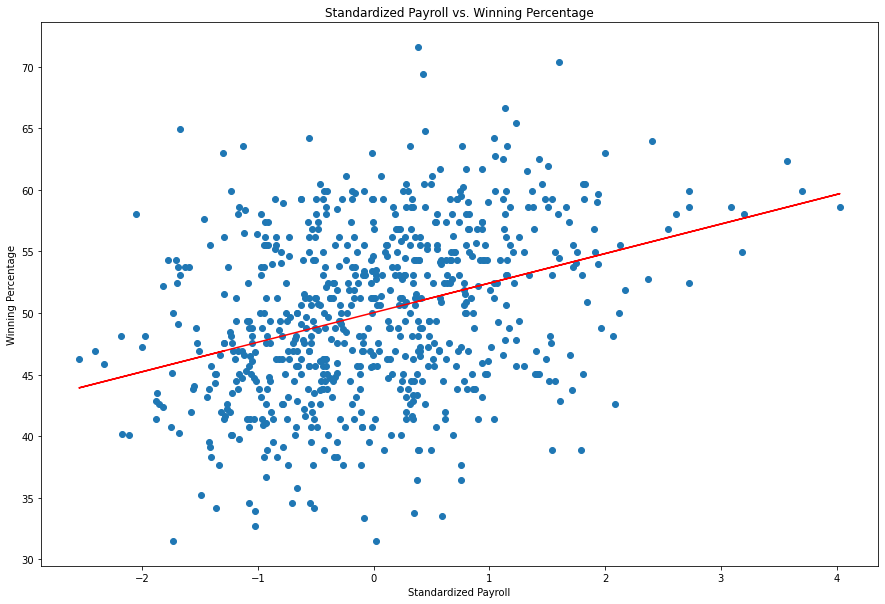

In [255]:
#Similar to previous parts. Firstly create an empty dictionary.
#Looping through elements to get payroll and winning percent
#Looping throught the dictionary to get total winning percentage and standardized payroll and plot.
bin_dict = {}
for i in range(0,858):
    if team_relation.iat[i,8] in bin_dict:
        if team_relation.iat[i,1] in bin_dict[team_relation.iat[i,8]]:
            bin_dict[team_relation.iat[i,8]][team_relation.iat[i,1]].append((team_relation.iat[i,9],team_relation.iat[i,6]))
        else :
            bin_dict[team_relation.iat[i,8]][team_relation.iat[i,1]] = []
    else: 
        bin_dict[team_relation.iat[i,8]] = {}
standardized_payroll = []
winpercent = []
annotations = []


for keys in bin_dict:
    plt.clf()
    for names in bin_dict[keys]:
        annotations.append(names)
        for element in bin_dict[keys][names]:
            standardized_payroll.append((np.array(element[0])))
            winpercent.append((np.array(element[1])))
            
#enlarge the graph size.           
plt.figure(figsize=(15,10))
plt.title("Standardized Payroll vs. Winning Percentage")
plt.xlabel("Standardized Payroll")
plt.ylabel("Winning Percentage")
plt.scatter(standardized_payroll, winpercent)
    
z = np.polyfit(standardized_payroll, winpercent, 1)
p = np.poly1d(z)
plt.plot(standardized_payroll,p(standardized_payroll),"r-")
plt.show()
    

Problem 8:

In [256]:
team_relation["Expected_Win"] = 50+2.5*team_relation["Standardized_Payroll"]
team_relation["Efficiency"] = team_relation["Winnig_Percentage"] - team_relation["Expected_Win"]

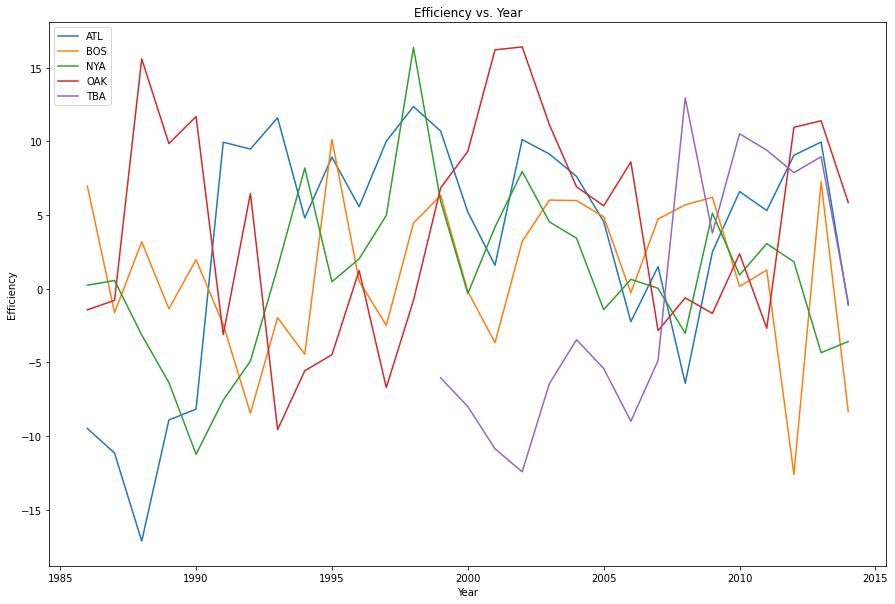

In [258]:
#Similar to previous parts. Firstly create an empty dictionary.
#Looping through elements to get payroll and winning percent
#Looping throught the dictionary to get total winning percentage and standardized payroll and plot.
eff_dict = {}

for i in range(0,858):
    if team_relation.iat[i,1] in eff_dict:
        eff_dict[team_relation.iat[i,1]].append((team_relation.iat[i,11],team_relation.iat[i,0]))
    else :
        eff_dict[team_relation.iat[i,1]] = []
          
efficiency = []
year = []
annotations = []
# nameID that we needed
names_new = ['OAK', 'BOS','NYA', 'ATL', 'TBA']


for names in eff_dict:
    if names in names_new:
        annotations.append(names)
        for element in eff_dict[names]:
            efficiency.append((np.array(element[0])))
            year.append((np.array(element[1])))
            
plt.figure(figsize=(15,10))
plt.title("Efficiency vs. Year")
plt.xlabel("Year")
plt.ylabel("Efficiency")

for key in eff_dict:
    #Check nameID
    if key in names_new:
        years = []
        eff = []
        for pair in eff_dict[key]:
            eff.append(pair[0])
            years.append(pair[1])
        plt.plot(years, eff, label = key)
        plt.legend(loc= "upper left")
plt.show()
    
    
    
    


Question 4:

Condensed linear graph is more stragihtforward and easier to get the realtionship between two variable, compared to points. 


From the graph, the efficiency is at first around 0 but then increased drmatically. It is very efficient till approximately 1990. After approximately 1990, it decreased till approximately 1997. At that time, it is not efficient. Then, it started to increase. Around 2000, the efficient was above 0. After approximately 2001, it decreased till 2010 but at that time, it is relatively efficient expecially around 2000. After 2010, it started to increase till 2013. At that time, it was efficient. After 2013, it decreased.


It reflects the statement in QUESTION that "not much more efficient than other teams in their spending before 2000, were much more efficient between 2000 and 2005, and by then other teams may have caught up" 